# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [4]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [49]:
print(f"shape: {df_tesla.shape}")
df_tesla.head()

shape: (124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [25]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [26]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [50]:
print(f"shape: {df_unemployment.shape}")
df_unemployment.head()

shape: (181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [30]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [32]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [51]:
print(f"shape: {df_btc_price.shape}")
df_btc_price.head()

shape: (2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [52]:
print(f"shape: {df_btc_search.shape}")
df_btc_search.head()

shape: (73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [42]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


In [46]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [47]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


- In **df_tesla, df_unemployment and df_btc_search** periodicity of time series data is **monthly**
- In **df_btc_price** periodicity of time series data is **daily**
- In **Google Trends** value **100** represents **the most popular** term, while value **50** represent **two times less popular** term... **0** means there was **not enough data** for this term

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [74]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [68]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [94]:
print(f"Missing values by column:\n{df_btc_price.isna().sum()}")

Missing values by column:
DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [84]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [99]:
print(f"Rows with missing values:")
df_btc_price[df_btc_price.CLOSE.isna()]

Rows with missing values:


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [100]:
df_btc_price.dropna(inplace=True)

In [103]:
print(f'Number of missing values after using .dropna(): {df_btc_price.isna().values.sum()}')

Number of missing values after using .dropna(): 0


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [110]:
print(f"data type before: {type(df_tesla.MONTH[0])}")
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
print(f"data type after: {type(df_tesla.MONTH[0])}")

data type before: <class 'str'>
data type after: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [111]:
print(f"data type before: {type(df_unemployment.MONTH[0])}")
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
print(f"data type after: {type(df_unemployment.MONTH[0])}")

data type before: <class 'str'>
data type after: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [112]:
print(f"data type before: {type(df_btc_search.MONTH[0])}")
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
print(f"data type after: {type(df_btc_search.MONTH[0])}")

data type before: <class 'str'>
data type after: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [113]:
print(f"data type before: {type(df_btc_price.DATE[0])}")
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
print(f"data type after: {type(df_btc_price.DATE[0])}")

data type before: <class 'str'>
data type after: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [115]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [118]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [199]:
# Create locators for ticks on the time axis
import matplotlib.dates as mdates
years = mdates.YearLocator()
months = mdates.MonthLocator()

In [200]:
# Register date converters to avoid warning messages
years_fmt = mdates.DateFormatter("%Y")

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

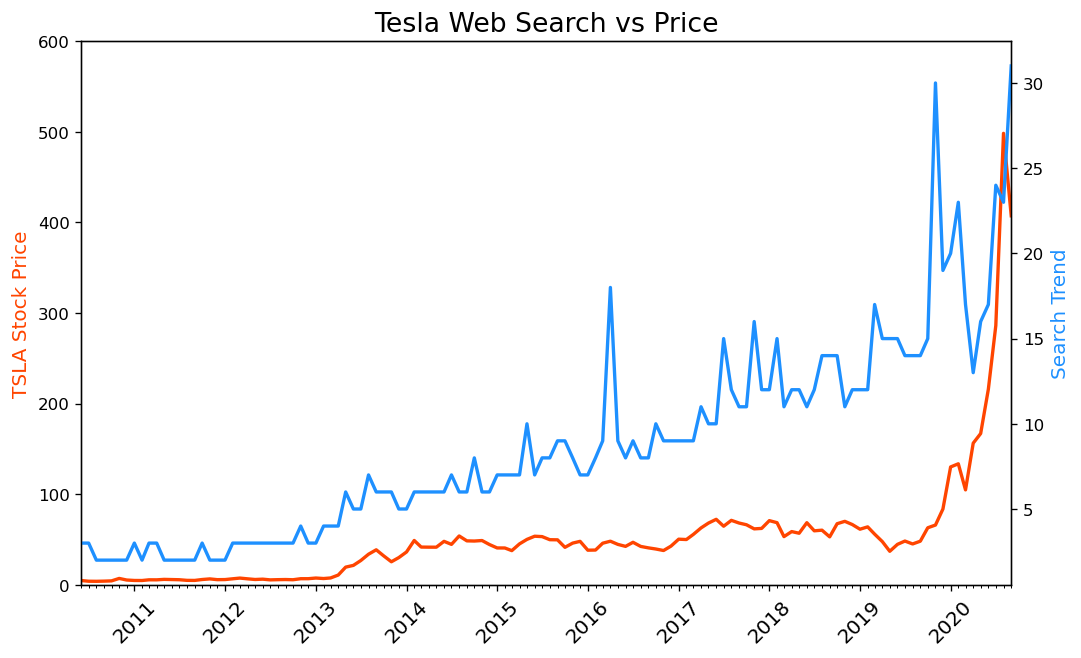

In [201]:
plt.figure(figsize=(10, 6), dpi=120) # change dots-per-inch, default: 100 
plt.xticks(fontsize=12, rotation=45)
plt.title("Tesla Web Search vs Price", fontsize=16)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="orangered", linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="dodgerblue", linewidth=2)

ax1.set_ylabel("TSLA Stock Price", color="orangered", fontsize=12)
ax2.set_ylabel("Search Trend", color="dodgerblue", fontsize=12)

ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0, 600])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

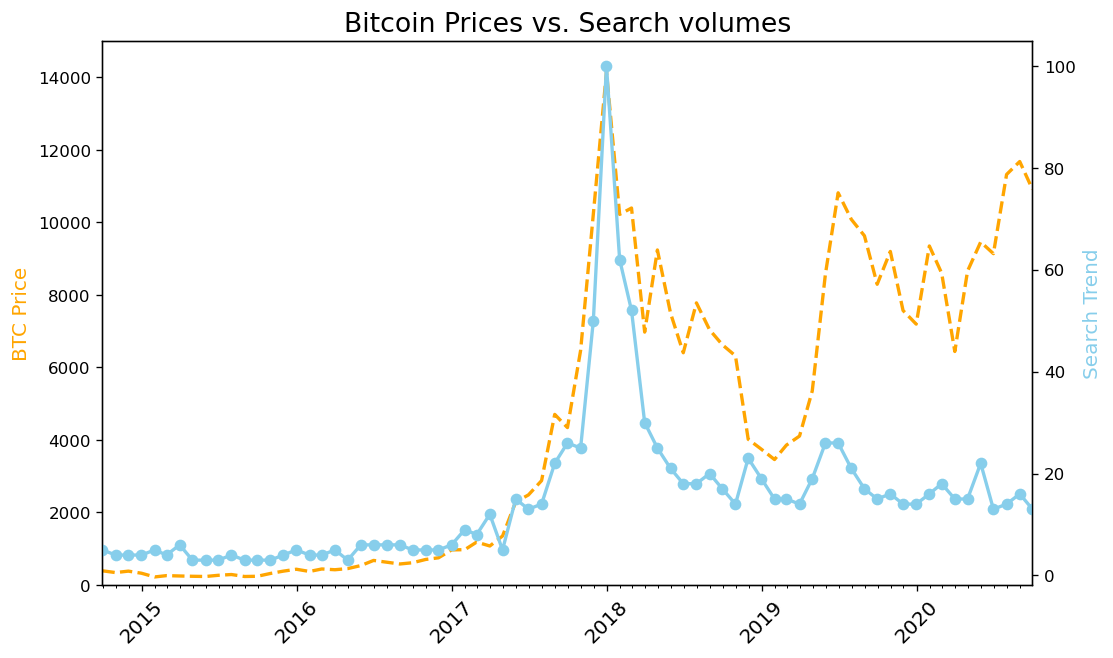

In [218]:
plt.figure(figsize=(10, 6), dpi=120) # change dots-per-inch, default: 100 
plt.xticks(fontsize=12, rotation=45)
plt.title("Bitcoin Prices vs. Search volumes", fontsize=16)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color="orange", linewidth=2, linestyle="--") # change line to dashed
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color="skyblue", linewidth=2, marker="o") # circles on peaks

ax1.set_ylabel("BTC Price", color="orange", fontsize=12)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=12)

ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
ax1.set_ylim(bottom=0, top=15000)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

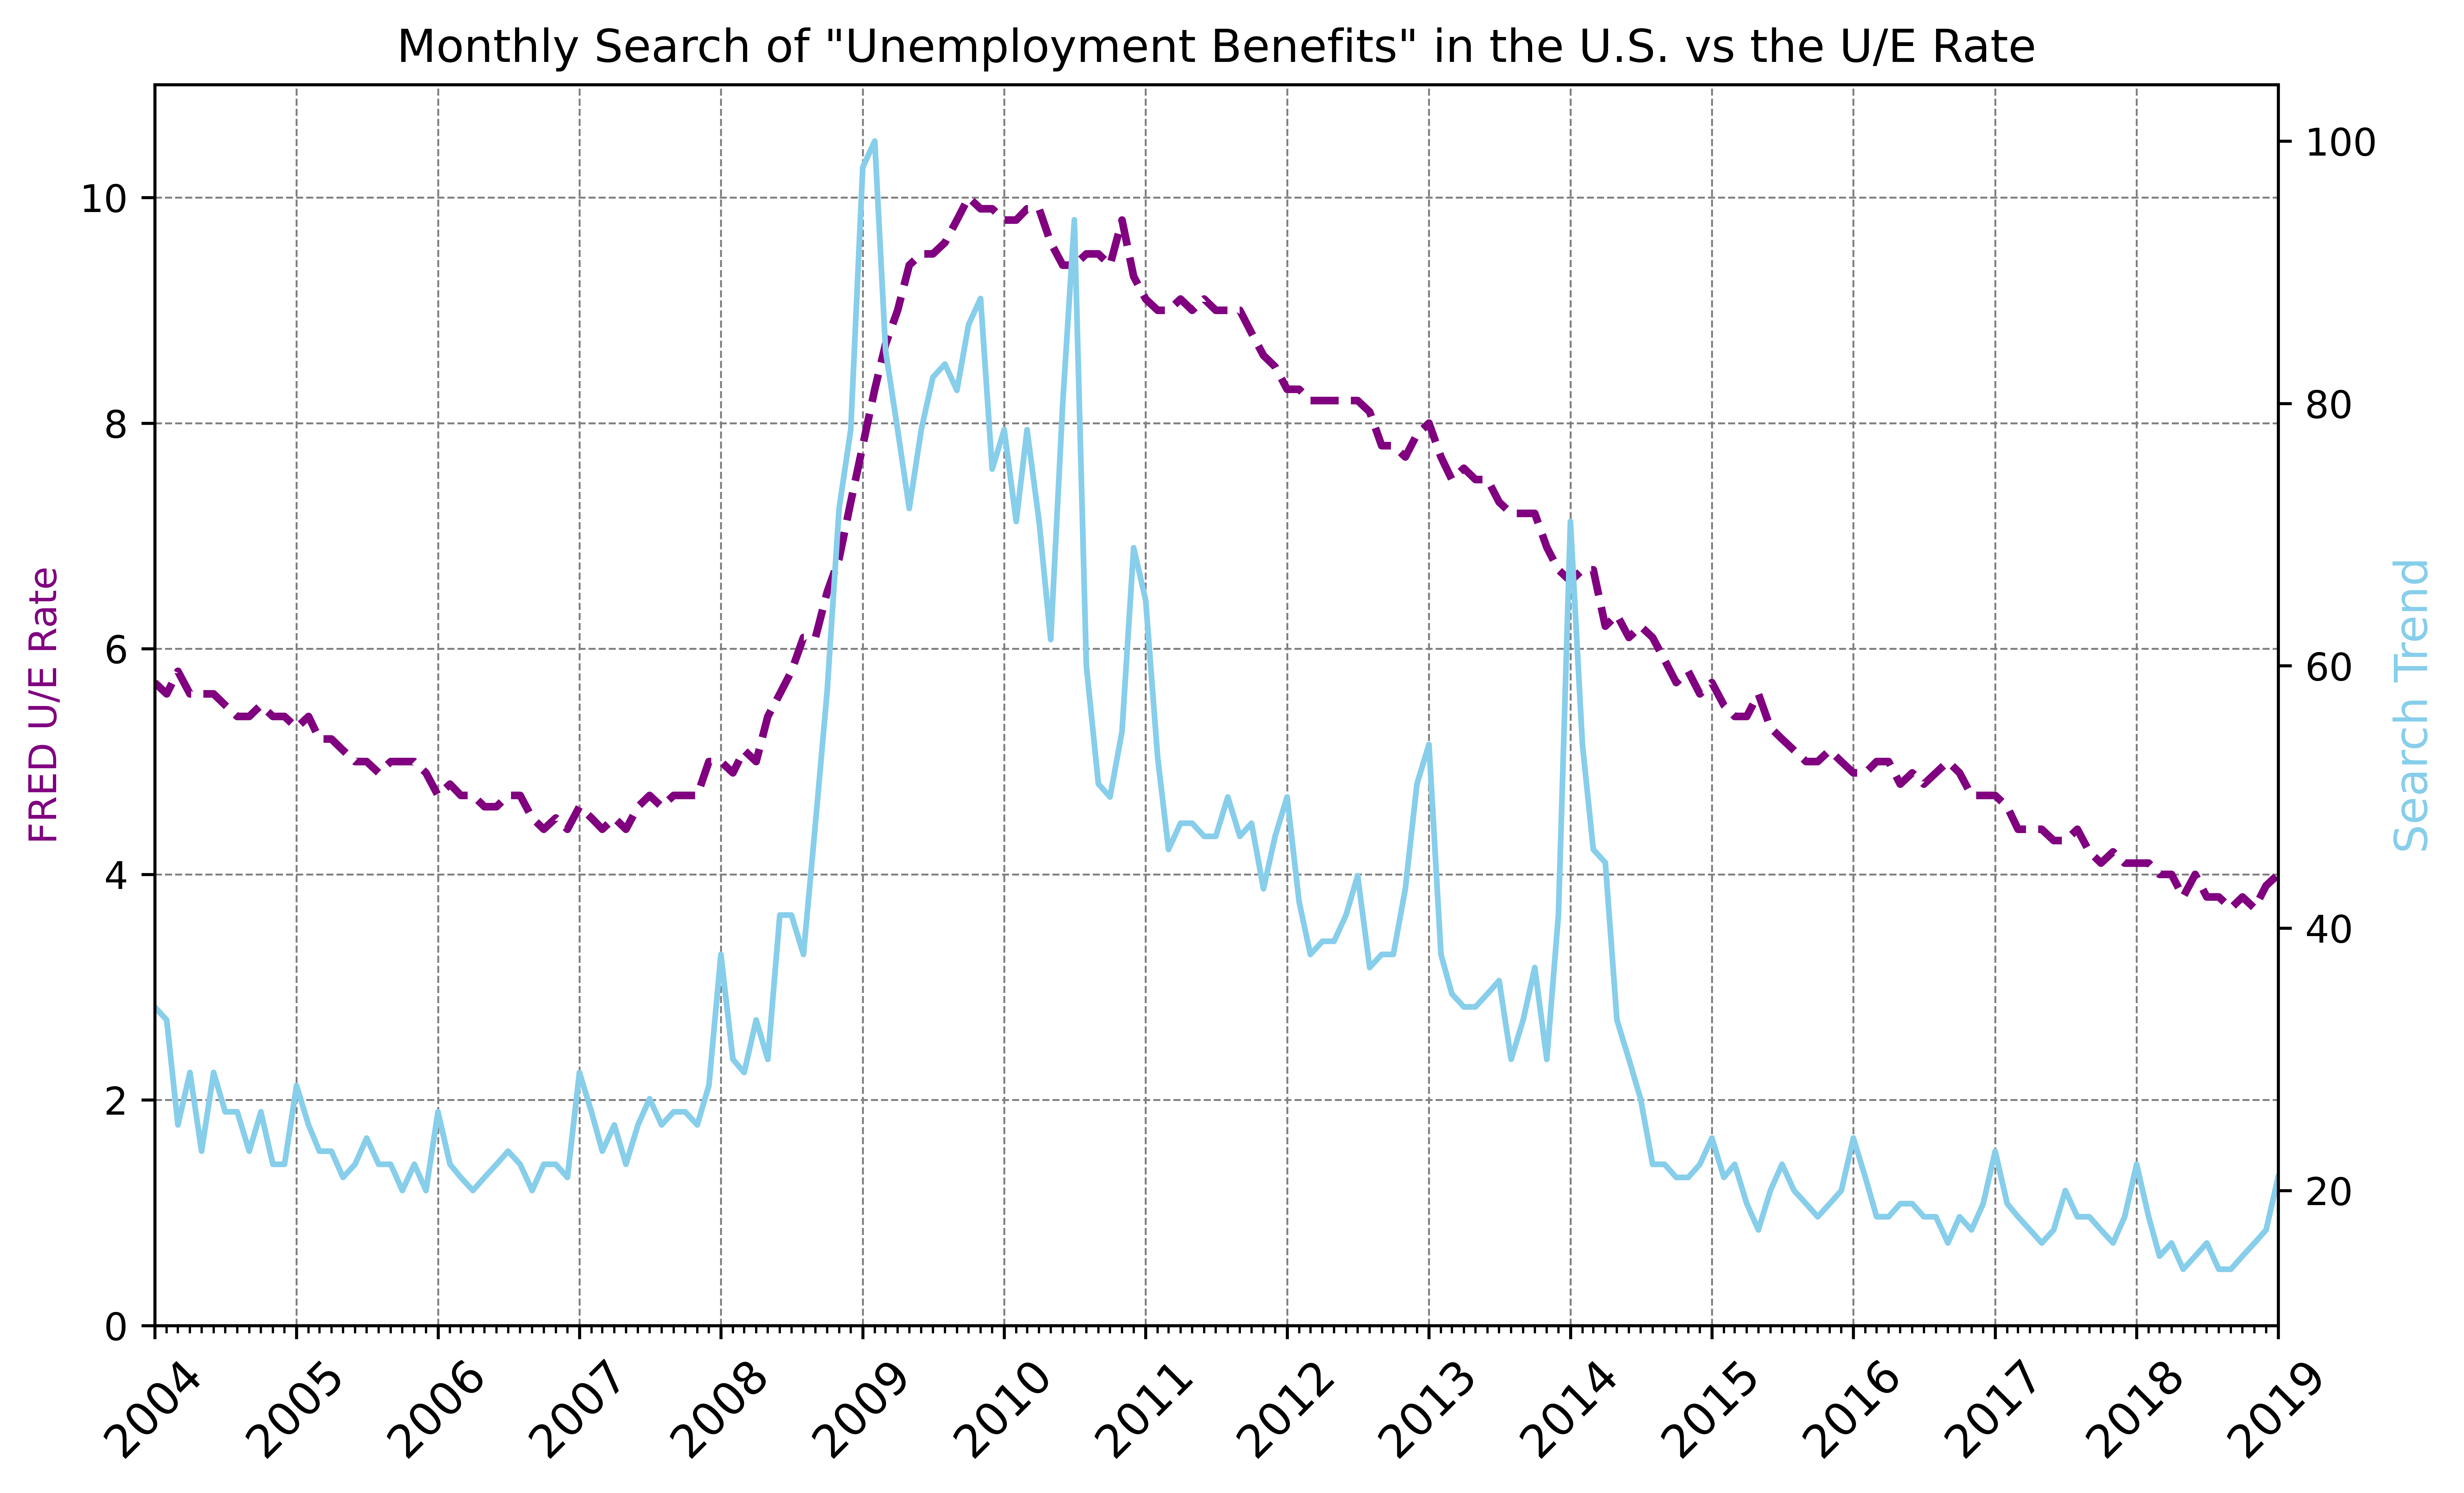

In [258]:
plt.figure(figsize=(10, 6))
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="purple", linestyle="--", linewidth=2) 
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="skyblue")

ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.set_ylim([0, 11])

ax1.set_ylabel("FRED U/E Rate", color="purple")
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=12)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.show()

<h3>Conclusion</h3>
<p>
Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market. What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis.
</p>
<hr>

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


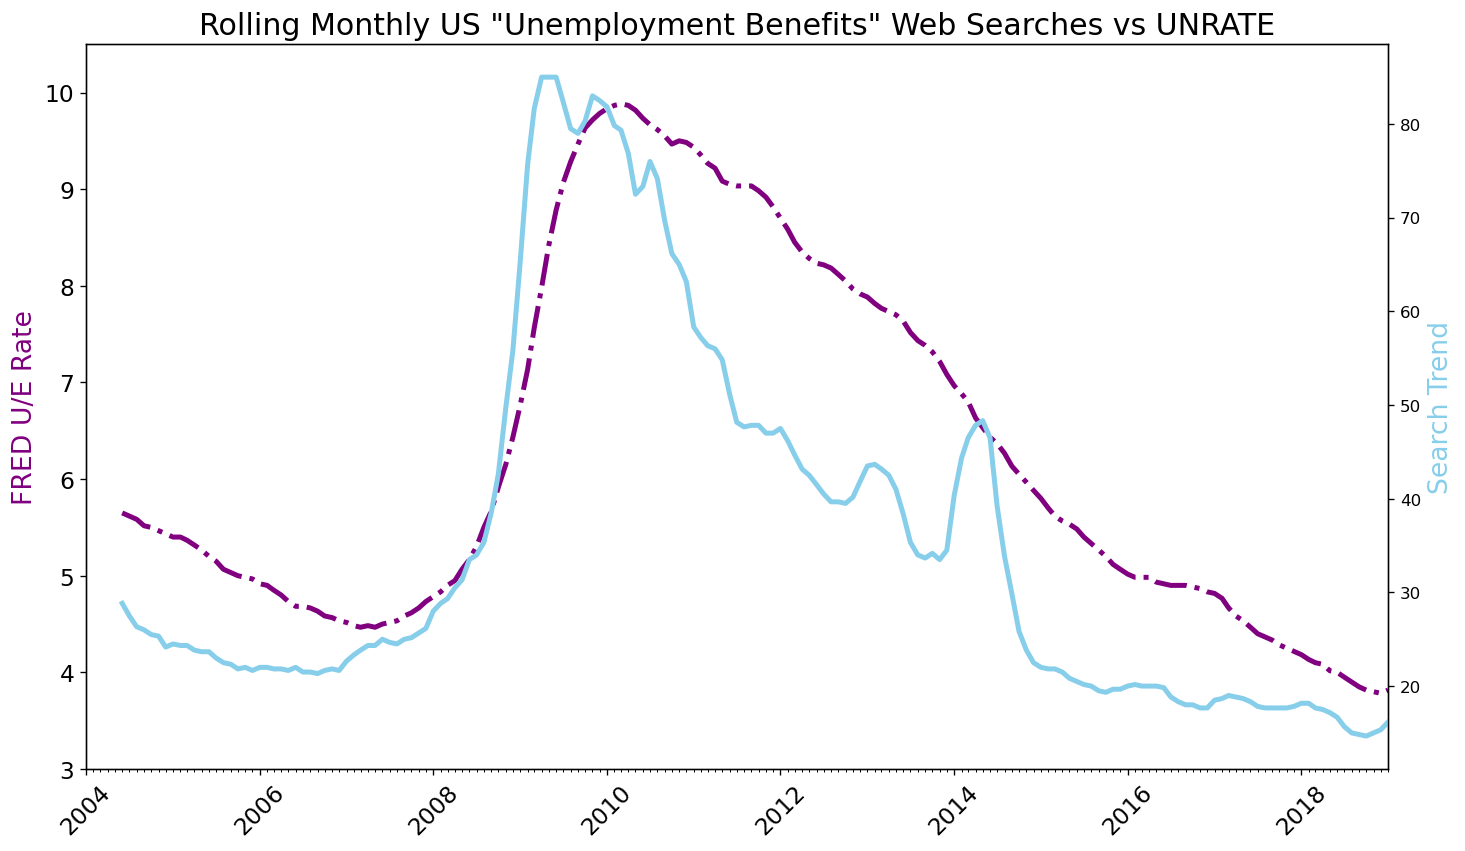

In [255]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [256]:
df_ue_2020 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

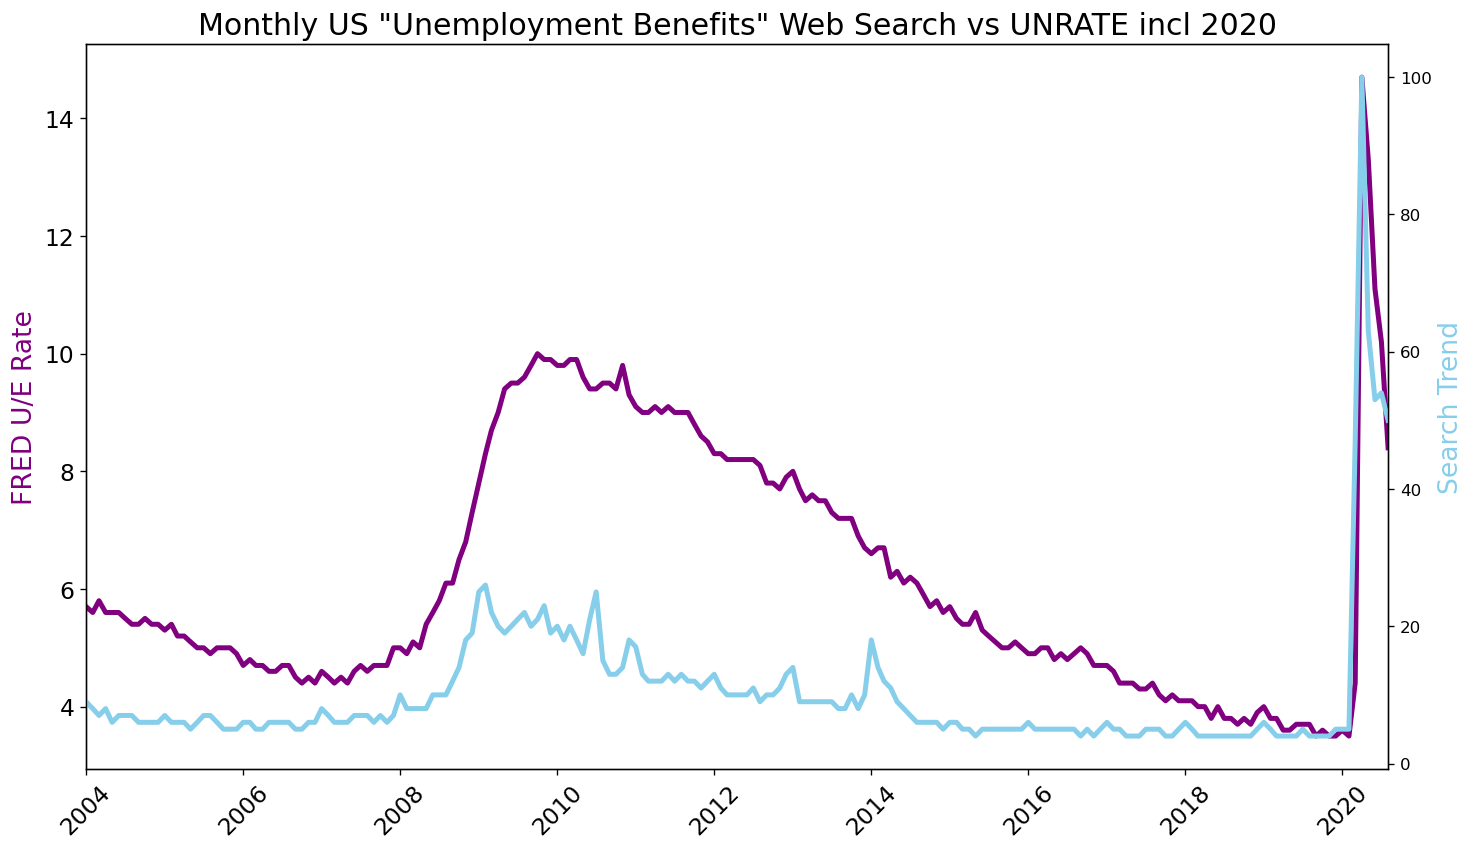

In [257]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

<h3>In this lesson we looked at how to:</h3>
<ul>
<li>
    How to use 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html">.describe()</a></strong>
    to quickly see some descriptive statistics at a glance.
</li>
<li>
    How to use 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html">.resample()</a></strong>
    to make a time-series data comparable to another by changing the periodicity.
</li>
<li>
    How to work with 
    <strong><a href="https://matplotlib.org/stable/api/dates_api.html">matplotlib.dates</a></strong>
    Locators to better style a timeline (e.g., an axis on a chart).
</li>
<li>
    How to find the number of NaN values with 
    <strong>.isna().values.sum()</strong>
</li>
<li>
    How to change the resolution of a chart using the 
    <strong><a href="https://matplotlib.org/stable/api/figure_api.html">figure</a></strong>'s dpi
</li>
<li>
    How to create dashed '--' and dotted '-.' lines using 
    <strong>
    <a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle">
    linestyles
    </a>
    </strong>
</li>
<li>
    How to use different kinds of 
    <strong><a href="https://matplotlib.org/3.5.0/api/markers_api.html">markers</a></strong>
    (e.g., 'o' or '^') on charts.
</li>
<li>
    Fine-tuning the styling of Matplotlib charts by using 
    <strong><a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.xlim.html">limits</a></strong>, 
    <strong><a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.xlabel.html">labels</a></strong>, 
    <strong>
    <a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linewidth">
    linewidth</a></strong> and 
    <strong><a href="https://matplotlib.org/3.5.0/_images/sphx_glr_named_colors_003.png">colours</a></strong> 
    (both in the form of named
    colours and HEX codes).
</li>
<li>
    Using 
    <strong><a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.grid.html">.grid()</a></strong>
    to help visually identify seasonality in a time series.
</li>
</ul>